# Введение в PyTorch

Сегодня мы познакомимся с **PyTorch** — одним из самых мощных и популярных инструментов для глубокого обучения.

Это научная вычислительная библиотека для Python, которая возникла как альтернатива с поддержкой GPU другой базовой и широко распространенной библиотеке NumPy. NumPy предоставляет удобный функционал для работы с многомерными массивами. Основным объектом **NumPy** является **массив** , реализованный с помощью класса ndarray. Это матрица элементов (обычно чисел) *одного типа*. Массив может быть *многомерным*, в NumPy его измерения называются осями (axes). В **PyTorch** аналогичные объекты называются **тензорами** (аналог numpy.ndarray), но дополнительно имеют возможность выполнять *вычисления на графических процессорах (GPU)*, что ускоряет их в десятки и сотни раз.

Библиотека PyTorch эффективно используется как платформа для глубокого обучения: PyTorch предлагает удобный и гибкий функционал для построения и обучения нейронных сетей.

**Ключевые особенности PyTorch**:
- Интуитивно понятный API: Код на PyTorch очень похож на обычный код на Python, что делает его легким для изучения и отладки.
- Динамические вычислительные графы (Define-by-Run): Это главная "фишка" PyTorch. Граф вычислений, необходимый для расчета градиентов, строится "на лету" во время выполнения кода. Это позволяет использовать стандартные конструкции Python (циклы, if-else) прямо внутри модели, что идеально подходит для сложных архитектур, как в RL (например, когда длина эпизода меняется).
- Поддержка GPU: легкий перенос вычислений между CPU и GPU.
- Огромное сообщество и экосистема: Множество готовых моделей, туториалов и библиотек (например, transformers, stable-baselines3) построены на PyTorch. А также большинство современных исследовательских статей по RL публикуются с кодом на PyTorch. Знание этого фреймворка открывает вам доступ к самым передовым разработкам.



![image.png](https://labs.quansight.org/images/2021/10/ninja_arrays.png)

### Установка и начало работы

Перед тем как начать, убедитесь, что PyTorch установлен. Если нет, это можно сделать с официального сайта https://pytorch.org/, выбрав вашу операционную систему и способ установки.

In [1]:
# Пример установки через pip для CPU
!pip install torch

После установки нужно импортировать библиотеку. В любом Python-скрипте или Jupyter Notebook мы импортируем библиотеку следующим образом:

In [ ]:
import torch

# Проверим версию
print(f"Версия PyTorch: {torch.__version__}")

Версия PyTorch: 2.8.0+cu126


### Основы работы с тензорами

**Тензор** - основной объект работы в PyTorch. Можно думать о нем как о многомерном массиве или матрице.

Примеры:
- Скаляр (число) — это 0-мерный тензор.
- Вектор — это 1-мерный тензор.
- Матрица — это 2-мерный тензор.

И так далее для большего числа измерений.

Как уже упоминалось, очнь похожим образом устроен ndarray из библиотеки NumPy, но у тензоров есть два дополнительных свойства:
- Они могут храниться и обрабатываться на GPU.
- Они могут отслеживать градиенты для автоматического дифференцирования.

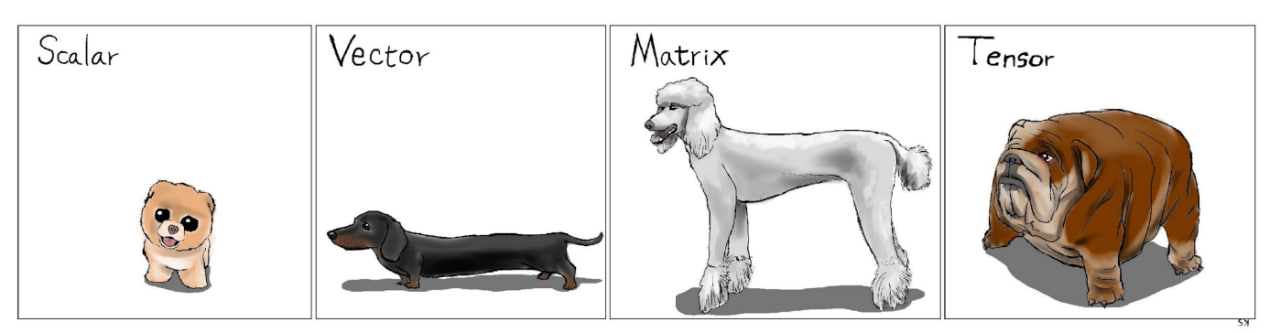

#### Создание тензора и заполнение значениями

In [ ]:
# Создание из списка Python
# В RL так можно задать, например, вектор состояния или наград
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
print(f"Тензор из списка:\n{x}\n")

Тензор из списка:
tensor([1., 2., 3., 4.])



In [ ]:
# Создание матриц (2D-тензоров)
matrix = torch.tensor([[1, 2], [3, 4]])
print(f"2D-тензор (матрица):\n{matrix}\n")

2D-тензор (матрица):
tensor([[1, 2],
        [3, 4]])



In [ ]:
# Создание тензоров, заполненных нулями или единицами
# Полезно для инициализации весов или масок
zeros_tensor = torch.zeros(2, 3) # 2 строки, 3 столбца
print(f"Тензор из нулей:\n{zeros_tensor}\n")

ones_tensor = torch.ones(3, 2)
print(f"Тензор из единиц:\n{ones_tensor}\n")

Тензор из нулей:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Тензор из единиц:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])



In [ ]:
# Создание тензоров со случайными значениями
# torch.rand - равномерное распределение от 0 до 1
# torch.randn - стандартное нормальное распределение (среднее 0, дисперсия 1)
rand_tensor = torch.rand(2, 3)
print(f"Случайный тензор (равномерное распр.):\n{rand_tensor}\n")

randn_tensor = torch.randn(2, 3)
print(f"Случайный тензор (нормальное распр.):\n{randn_tensor}\n")

Случайный тензор (равномерное распр.):
tensor([[0.1504, 0.3065, 0.8905],
        [0.6680, 0.4879, 0.8620]])

Случайный тензор (нормальное распр.):
tensor([[ 0.1432,  1.2496, -0.0083],
        [ 0.0300,  0.3422,  1.3166]])



In [ ]:
# Создание тензора с теми же размерами, что и у другого
# Удобно, когда нужно создать тензор такой же формы, не зная ее заранее
like_zeros = torch.zeros_like(x)
print(f"Тензор нулей с формой как у 'state':\n{like_zeros}\n")

Тензор нулей с формой как у 'state':
tensor([0., 0., 0., 0.])



#### Типы данных

Каждый тензор имеет **тип данных (dtype)**. Важно обращать на это внимание, так как некоторые операции требуют определенных типов.

Примеры основных типов:
- **torch.float32** или **torch.float**: 32-битное число с плавающей точкой. Это стандартный тип для весов нейросетей и входных данных.
- **torch.int64** или **torch.long**: 64-битное целое число. Используется для индексов и дискретных действий в RL.
- **torch.bool**: бинарный тип (True или False).

In [ ]:
# PyTorch часто сам определяет тип, но лучше контролировать его явно
float_tensor = torch.tensor([1, 2, 3], dtype=torch.float32)
print(f"Тензор: {float_tensor}, Тип: {float_tensor.dtype}\n")

int_tensor = torch.tensor([1, 2, 3], dtype=torch.long)
print(f"Тензор: {int_tensor}, Тип: {int_tensor.dtype}\n")

# Преобразование типов
# Способ 1: метод .to()
new_float_tensor = int_tensor.to(torch.float32)
print(f"После конвертации в float: {new_float_tensor}, Тип: {new_float_tensor.dtype}\n")

# Способ 2: короткие методы .float(), .long() и т.д.
new_int_tensor = float_tensor.long()
print(f"После конвертации в long: {new_int_tensor}, Тип: {new_int_tensor.dtype}\n")

Тензор: tensor([1., 2., 3.]), Тип: torch.float32

Тензор: tensor([1, 2, 3]), Тип: torch.int64

После конвертации в float: tensor([1., 2., 3.]), Тип: torch.float32

После конвертации в long: tensor([1, 2, 3]), Тип: torch.int64



#### Атрибуты тензора: форма, тип и устройство

У каждого тензора есть три важных атрибута, которые нужно постоянно проверять:

* **.shape** (или **.size()**): показывает размерность тензора.

* **.dtype**: показывает тип данных.

* **.device**: показывает, где хранится тензор — на cpu или cuda (GPU).

In [ ]:
# Создадим тензор для примера
data = torch.randn(3, 4) # 3 строки, 4 столбца

# Выведем его атрибуты
print(f"Тензор:\n{data}\n")
print(f"Форма (shape): {data.shape}")
print(f"Тип данных (dtype): {data.dtype}")
print(f"Устройство (device): {data.device}")

Тензор:
tensor([[ 1.3289,  1.6378,  0.5244,  0.4833],
        [ 1.1452,  1.0515, -1.7289,  0.8849],
        [-0.3029,  0.1883,  1.2038, -1.4904]])

Форма (shape): torch.Size([3, 4])
Тип данных (dtype): torch.float32
Устройство (device): cpu


Аттрибуты - очень важные инструменты при отладке кода, с их помощью можно найти моменты некорректного обращения с тензорами.

#### Практическое задание

Создайте вектор (1D-тензор) из 5 элементов. Значения могут быть любыми. Этот вектор например, может соответствовать состоянию какой-нибудь среды


Создайте матрицу (2D-тензор) размером 3x2, заполненную случайными числами из стандартного нормального распределения. Такая матрица, например, может рассматриваться и использоваться как слой нейросети, инициализировнный начальными значениями.


Создайте 1D-тензор с целочисленными значениями [0, 2, 1]. Это будут индексы действий. Преобразуйте его в тип torch.long.


Для каждого из созданных тензоров выведите на экран его форму (.shape), тип данных (.dtype) и устройство (.device).

#### Решение задания

In [ ]:
# 1. Вектор состояния
state_vector = torch.tensor([0.5, -1.2, 0.0, 2.1, -0.8], dtype=torch.float32)

# 2. Матрица весов
weights_matrix = torch.randn(3, 2)

# 3. Индексы действий
action_indices = torch.tensor([0, 2, 1])
action_indices = action_indices.long() # или .to(torch.long)

# 4. Вывод атрибутов
print("--- Вектор состояния ---")
print(f"Тензор: {state_vector}")
print(f"Форма: {state_vector.shape}")
print(f"Тип: {state_vector.dtype}")
print(f"Устройство: {state_vector.device}\n")

print("--- Матрица весов ---")
print(f"Тензор:\n{weights_matrix}")
print(f"Форма: {weights_matrix.shape}")
print(f"Тип: {weights_matrix.dtype}")
print(f"Устройство: {weights_matrix.device}\n")

print("--- Индексы действий ---")
print(f"Тензор: {action_indices}")
print(f"Форма: {action_indices.shape}")
print(f"Тип: {action_indices.dtype}")
print(f"Устройство: {action_indices.device}\n")

--- Вектор состояния ---
Тензор: tensor([ 0.5000, -1.2000,  0.0000,  2.1000, -0.8000])
Форма: torch.Size([5])
Тип: torch.float32
Устройство: cpu

--- Матрица весов ---
Тензор:
tensor([[ 0.2442,  1.0709],
        [-1.4291,  0.2046],
        [ 0.5080, -0.7523]])
Форма: torch.Size([3, 2])
Тип: torch.float32
Устройство: cpu

--- Индексы действий ---
Тензор: tensor([0, 2, 1])
Форма: torch.Size([3])
Тип: torch.int64
Устройство: cpu



## Операции с тензорами

### Математические, логические и аггрегирующие операции

PyTorch позволяет выполнять широкий спектр операций с тензорами.

**Поэлементные операции**: Стандартные операторы +, -, *, / работают поэлементно.

In [ ]:
a = torch.tensor([1, 2, 3], dtype=torch.float32)
b = torch.tensor([4, 5, 6], dtype=torch.float32)

print(f"Сложение: {a + b}")
print(f"Умножение: {a * b}")

Сложение: tensor([5., 7., 9.])
Умножение: tensor([ 4., 10., 18.])


**Матричное умножение**: Это одна из самых частых операций в нейросетях. Используйте оператор @ или функцию torch.matmul().

In [ ]:
matrix_A = torch.randn(3, 2) # Матрица 3x2
matrix_B = torch.randn(2, 4) # Матрица 2x4

# Результатом будет матрица 3x4
product = matrix_A @ matrix_B
print(f"Результат матричного умножения:\n{product}")
print(f"Форма результата: {product.shape}")

Результат матричного умножения:
tensor([[-2.1672,  0.7741,  2.8182,  1.6471],
        [ 0.4397, -0.6105, -0.6183, -0.7915],
        [ 2.2806,  2.0399, -2.6733,  1.1455]])
Форма результата: torch.Size([3, 4])


Часто нам нужно "свернуть" тензор в одно число: найти сумму, среднее, максимум и т.д.

In [ ]:
data = torch.randn(5, 10) # Представим, что это батч из 5 векторов наград

# Считаем по всему тензору
print(f"Сумма всех элементов: {data.sum()}")
print(f"Среднее всех элементов: {data.mean()}")

# Можно указать ось (dim), вдоль которой производится операция
# dim=0 - по строкам, dim=1 - по столбцам
print(f"Среднее по каждому столбцу (по батчу): {data.mean(dim=0).shape}")
print(f"Сумма по каждой строке (по каждому элементу батча): {data.sum(dim=1).shape}")

Сумма всех элементов: 15.247015953063965
Среднее всех элементов: 0.3049403131008148
Среднее по каждому столбцу (по батчу): torch.Size([10])
Сумма по каждой строке (по каждому элементу батча): torch.Size([5])


В RL нам нужно будет часто выбирать лучшее действие. Для этого используются **.max()** и **.argmax()**.

.max(): Возвращает кортеж (значение, индекс).

.argmax(): Возвращает только индекс максимального элемента.

In [ ]:
# Батч из 4-х состояний, для каждого есть Q-значения для 3-х действий
# Форма: (batch_size, num_actions)
q_values = torch.tensor([
    [1.0, 3.5, 2.1],  # Q-значения для состояния 1
    [0.5, 1.1, 4.2],  # Q-значения для состояния 2
    [6.0, 2.5, 3.3],
    [1.0, -1.0, 1.1]
])

# Нам нужно найти лучшее действие для каждого состояния в батче
# Поэтому применяем операцию вдоль оси 1 (оси действий)
best_actions = torch.argmax(q_values, dim=1)

print(f"Q-значения:\n{q_values}")
print(f"Лучшие действия (индексы): {best_actions}")
print(f"Тип данных индексов: {best_actions.dtype}") # Обратите внимание, это long!

Q-значения:
tensor([[ 1.0000,  3.5000,  2.1000],
        [ 0.5000,  1.1000,  4.2000],
        [ 6.0000,  2.5000,  3.3000],
        [ 1.0000, -1.0000,  1.1000]])
Лучшие действия (индексы): tensor([1, 2, 0, 2])
Тип данных индексов: torch.int64


### Индексы, срезы, изменение формы

Доступ к элементам тензора работает точно так же, как в NumPy.

In [ ]:
data = torch.arange(10) # Тензор [0, 1, 2, ..., 9]
print(f"Исходный тензор: {data}")
print(f"Первый элемент: {data[0]}")
print(f"Последний элемент: {data[-1]}")
print(f"Срез с 1 по 4 элемент: {data[1:5]}")

# Для многомерных тензоров
matrix = torch.randn(3, 4)
print(f"\nМатрица:\n{matrix}")
print(f"Первая строка: {matrix[0]}")
print(f"Второй столбец: {matrix[:, 1]}")

Исходный тензор: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Первый элемент: 0
Последний элемент: 9
Срез с 1 по 4 элемент: tensor([1, 2, 3, 4])

Матрица:
tensor([[-0.6499, -0.4948, -1.2207, -0.9345],
        [-0.4830, -0.5571, -0.9609, -0.9185],
        [ 1.5689,  0.4847,  0.1505,  2.3985]])
Первая строка: tensor([-0.6499, -0.4948, -1.2207, -0.9345])
Второй столбец: tensor([-0.4948, -0.5571,  0.4847])


Иногда требуется произвести манипуляции с разммерностью массива с помощью методов **.view()** и **.reshape()**

**.view()** требует, чтобы данные в памяти были непрерывными, **.reshape()** более гибкий.

**.unsqueeze(dim)**: Добавляет измерение размерности 1 в указанной позиции.

**.squeeze(dim)**: Убирает измерение размерности 1.

Пример активного использования - работа с батчами (группами данных из датасета, собранных вместе в новый тензор, таким образом получается дополнительная размерность для индексации номера элемента в батче). Например, ваша сеть ожидает на вход данные в формате (batch_size, num_features) - один батч, а у вы хотите подавать на вход объектв по отдельности, а размерность одного объекта (num_features,). Тогда нужно добавить "батчевое" измерение (1, num_features).

In [ ]:
state = torch.randn(4)
print(f"Исходная форма: {state.shape}") # torch.Size([4])

# Нейросеть ожидает батч на входе. Добавим батчевое измерение
state_batch = state.unsqueeze(0)
print(f"После unsqueeze(0): {state_batch.shape}") # torch.Size([1, 4])

# обратная ситуация: получили ответ от сети для одного элемента и хотим убрать лишнее измерение
output = torch.randn(1, 2) # Ответ сети для одного элемента батча
print(f"\nВыход сети: {output.shape}") # torch.Size([1, 2])
output_squeezed = output.squeeze(0)
print(f"После squeeze(0): {output_squeezed.shape}") # torch.Size([2])

Исходная форма: torch.Size([4])
После unsqueeze(0): torch.Size([1, 4])

Выход сети: torch.Size([1, 2])
После squeeze(0): torch.Size([2])


### Объединение тензоров

**torch.cat(tensors, dim=0)**: Конкатенирует (сшивает) тензоры вдоль существующей оси.

**torch.stack(tensors, dim=0)**: "Складывает" тензоры в стопку, создавая новую ось.

Это часто используется для сбора данных (состояний, действий, наград) из эпизода в единый батч.

In [ ]:
t1 = torch.randn(2, 3)
t2 = torch.randn(2, 3)

# Конкатенация вдоль оси 0 (по строкам)
# (2, 3) и (2, 3) -> (4, 3)
cat_result = torch.cat([t1, t2], dim=0)
print(f"cat(dim=0) форма: {cat_result.shape}")

# Конкатенация вдоль оси 1 (по столбцам)
# (2, 3) и (2, 3) -> (2, 6)
cat_result_dim1 = torch.cat([t1, t2], dim=1)
print(f"cat(dim=1) форма: {cat_result_dim1.shape}")

# Стэкинг
# (2, 3) и (2, 3) -> (2, 2, 3) (создалась новая ось по dim=0)
stack_result = torch.stack([t1, t2], dim=0)
print(f"stack(dim=0) форма: {stack_result.shape}")

cat(dim=0) форма: torch.Size([4, 3])
cat(dim=1) форма: torch.Size([2, 6])
stack(dim=0) форма: torch.Size([2, 2, 3])


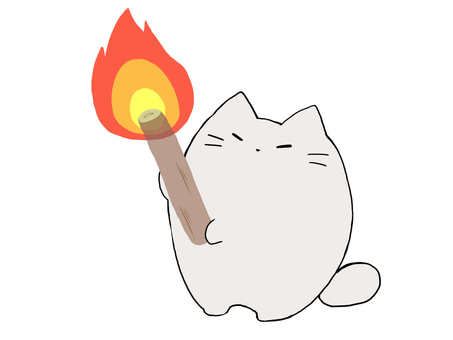

### Взаимодействие с numpy

PyTorch и NumPy хорошо совместимы.

**tensor.numpy()**: Преобразовать тензор в массив NumPy.

**torch.from_numpy(array)**: Преобразовать массив NumPy в тензор.

Важно: Тензор на CPU и массив NumPy будут использовать одну и ту же область памяти. Изменение одного объекта изменит и другой!

In [ ]:
import numpy as np

numpy_array = np.ones(5)
torch_tensor = torch.from_numpy(numpy_array)

print(f"До изменения: {torch_tensor}")
numpy_array += 1 # Меняем массив NumPy
print(f"После изменения: {torch_tensor}") # Тензор тоже изменился!

До изменения: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
После изменения: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### Перенос тензоров на GPU

Чтобы ускорить вычисления, перенесем тензоры на GPU.

In [ ]:
# 1. Проверяем, доступен ли GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Используемое устройство: {device}")

# 2. Создаем тензор (по умолчанию он на CPU)
cpu_tensor = torch.randn(2, 2)
print(f"Тензор на CPU: {cpu_tensor.device}")

# 3. Перемещаем его на наше устройство (GPU, если есть)
gpu_tensor = cpu_tensor.to(device)
print(f"Тензор на GPU: {gpu_tensor.device}")

Используемое устройство: cpu
Тензор на CPU: cpu
Тензор на GPU: cpu


Важное правило: Все тензоры, участвующие в одной операции, должны находиться на одном и том же устройстве. Если вы попытаетесь сложить тензор с CPU и тензор с GPU, получите ошибку.



### Задание

Создайте два случайных тензора A (формат 4x3) и B (формат 3x5).

Выполните их матричное умножение, чтобы получить тензор C. Какая у него форма?

Возьмите первую строку из тензора C. Её форма будет (5,). Используя unsqueeze, превратите её в тензор-строку (1, 5).

Создайте еще один тензор-строку D формы (1, 5).

Объедините два тензора-строки (из шагов 3 и 4) с помощью torch.cat и torch.stack. Выведите на экран формы результатов и объясните разницу.

### Решение задания

In [ ]:
# 1. Создаем тензоры
A = torch.randn(4, 3)
B = torch.randn(3, 5)

# 2. Матричное умножение
C = A @ B
print(f"Форма тензора C: {C.shape}\n") # Ожидаем (4, 5)

# 3. Берем первую строку и меняем форму
first_row = C[0]
print(f"Форма первой строки: {first_row.shape}")
row_vector = first_row.unsqueeze(0)
print(f"Форма после unsqueeze: {row_vector.shape}\n")

# 4. Создаем второй тензор-строку
D = torch.randn(1, 5)
print(f"Форма тензора D: {D.shape}\n")

# 5. Объединяем
# cat сшивает вдоль существующей оси 0. (1, 5) и (1, 5) -> (2, 5)
cat_res = torch.cat([row_vector, D], dim=0)
print("--- torch.cat ---")
print(f"Результат cat: {cat_res.shape}")
print("Сшивает тензоры, сохраняя число измерений.\n")


# stack создает новую ось. (1, 5) и (1, 5) -> (2, 1, 5)
stack_res = torch.stack([row_vector, D], dim=0)
print("--- torch.stack ---")
print(f"Результат stack: {stack_res.shape}")
print("Упаковывает тензоры в новое измерение.")

Форма тензора C: torch.Size([4, 5])

Форма первой строки: torch.Size([5])
Форма после unsqueeze: torch.Size([1, 5])

Форма тензора D: torch.Size([1, 5])

--- torch.cat ---
Результат cat: torch.Size([2, 5])
Сшивает тензоры, сохраняя число измерений.

--- torch.stack ---
Результат stack: torch.Size([2, 1, 5])
Упаковывает тензоры в новое измерение.


## Автоматическое дифференцирование

**torch.autograd** — это движок, который автоматически вычисляет градиенты (производные). Используется для обучения любой нейронной сети методом градиентного спуска.

Как это работает?

Когда вы создаете тензор с параметром **requires_grad=True**, PyTorch начинает отслеживать все операции с ним.

В процессе выполнения операций PyTorch "в фоновом режиме" строит динамический вычислительный граф.

Узлы в этом графе — это тензоры, а рёбра — это функции (операции), которые их создали.

In [ ]:
# Тензоры, по которым мы хотим считать градиенты (например, веса сети),
# должны иметь requires_grad=True
w = torch.tensor([2.0], requires_grad=True)
x = torch.tensor([5.0])

# y зависит от w, поэтому эта операция будет отслежена
y = w * x

print(f"Тензор y: {y}")
# y запомнила, как она была получена. Это можно увидеть через атрибут .grad_fn
print(f"Функция градиента для y: {y.grad_fn}")

Тензор y: tensor([10.], grad_fn=<MulBackward0>)
Функция градиента для y: <MulBackward0 object at 0x7b0d87e6bcd0>


y знает, что она является результатом умножения (MulBackward0), и через нее можно будет "добраться" до w

### Вычисление градиентов

Чтобы запустить вычисление градиентов по всему графу, мы вызываем метод **.backward()** у конечного скалярного значения (обычно это функция потерь, loss).

PyTorch проходит по графу в обратном направлении (отсюда и название backward) и вычисляет градиент этого скаляра по всем тензорам с requires_grad=True.

Результаты сохраняются в атрибуте .grad этих тензоров.

Пример: найти производную функции $y=3w
^2
 +5$ в точке w=2.
Аналитически, производная
$\frac{dy}{dw}=6w$. В точке w=2 она равна 12.

In [ ]:
w = torch.tensor([2.0], requires_grad=True)
y = 3 * w**2 + 5

# y - это скаляр. Вызываем backward()
y.backward()

# Проверяем градиент, сохраненный в w.grad
print(f"Градиент dy/dw в точке w=2: {w.grad}") # Ожидаем tensor([12.])

Градиент dy/dw в точке w=2: tensor([12.])


Градиенты накапливаются! При каждом вызове .backward() новые значения градиентов добавляются к старым в .grad. Перед каждым шагом обучения их нужно обнулять.

In [ ]:
# Обычно это делается так в цикле обучения:
# optimizer.zero_grad()
# или вручную:
w.grad.zero_() # _ в конце означает операцию "in-place" (изменение на месте)

tensor([0.])

Отключение градиентов с **torch.no_grad()**: Когда мы не обучаем модель, а просто используем ее для получения предсказаний (inference), нам не нужно строить граф и считать градиенты. Это экономит память и ускоряет вычисления. Для этого используется контекстный менеджер with torch.no_grad():.

In [ ]:
print(f"w.requires_grad: {w.requires_grad}") # True

with torch.no_grad():
    z = w * 2
    print(f"z.requires_grad: {z.requires_grad}") # False, отслеживание отключено

# Снова включено после выхода из блока
k = w * 2
print(f"k.requires_grad: {k.requires_grad}") # True

w.requires_grad: True
z.requires_grad: False
k.requires_grad: True


## Обучение нейросетей

### Введение, нейрон, полносвязный слой

Пакет torch.nn — это библиотека, содержащая все необходимые строительные блоки для создания и обучения нейронных сетей.

nn.Module: Базовый класс для всех моделей. Когда вы создаете свою сеть, вы наследуетесь от него. Он автоматически отслеживает все обучаемые параметры вашей модели.

nn.Linear(in_features, out_features): Полносвязный слой, который применяет к данным линейное преобразование $y=xA
^T
 +b$. Это основной компонент большинства нейросетей.

Функции активации: Обычно импортируются из torch.nn.functional (обычно импортируют как F). Они добавляют нелинейность, позволяя сети изучать сложные зависимости. Самая популярная — F.relu (Rectified Linear Unit).

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt #для отрисовки графиков

Архитектуру нейросети можно создавать как "конструктор", комбинируя разные слои и функции активации

В данном примере создадим архитектуру, которая называется **Multilayer Perceptron (MLP)**, состоящую только из полносвязных слоёв и функций активации.

Простейшая нейросеть состоит из **нейронов** - вычислительных узлов.

Каждый узел принимает на вход численную информацию **input**($X1, X2, X3$), производит над ней некую арифметическую операцию (**$f(\sum_{i=1}^nw_iX_i)$**) и передает результат **output** ($Y$) дальше по сети.

**$w_1, w_2, w_3$** - параметры нейрона, называющиеся **весами**.

Чтобы добавить к поведению нейрона **нелинейность** (а умножение входных данных $X$ на параметры $w$ - линейная операция), то есть усложнить сеть, используются **функции активации** $f$.

Итого, получается функция вида: $Y = f(w_1*X_1+w_2*X_2+w_3*X_3)$

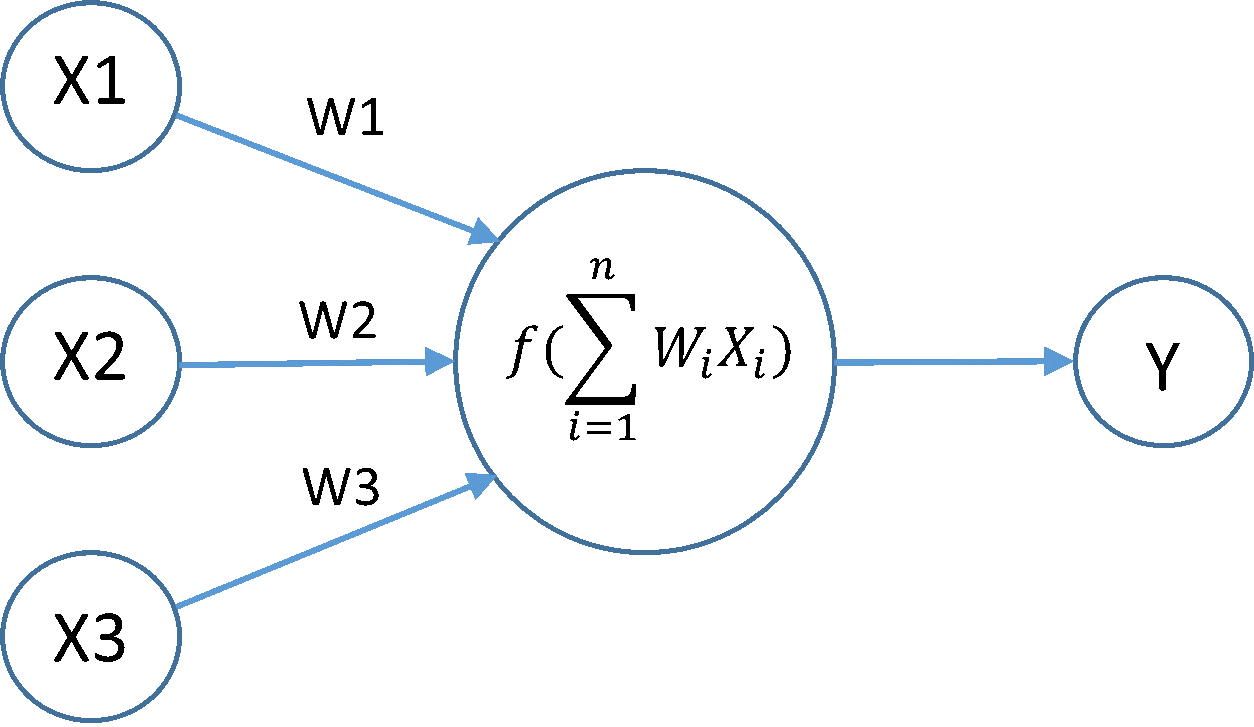

Нейроны объединяются в слои. **Полносвязные слои** (dense layers) нейронов: все элементы входных данных связаны с каждым нейроном.

Слои нейронов между входными и выходными данными называются **скрытыми слоями** (hidden layers). Чем больше слоев, тем **глубже** нейросеть.

<img src="https://neurohive.io/wp-content/uploads/2018/07/neuronnaya-set.gif" width="500">

В PyTorch полносвязный слой можно создавать с помощью класса `nn.Linear(input_features, output_features, bias = True)`

В качестве входных параметров передаём:
- `input_features` -- размер одного входного тензора $x$
- `output_features` -- размер одного выходного тензора $y$
- `bias` -- будет ли слой обучать смещение $b$, по умолчанию True

Этот слой хранит в себе два типа параметров: веса (weights), задаваемые матрицей $A$, и смещения (biases), задаваемые вектором $b$, если они включены.

Слой делает следующее преобразование над входом x, если есть смещение:
$$y = xA^T+b$$

иначе просто матричное умножение:
$$y = xA^T$$

*Примечание:*
Так как обучение часто происходит по батчам, линейный слой построен так, что он может принимать на вход данные размерности $(\cdot, input\_features)$ и возвращать $(\cdot, output\_features)$, где в качестве $\cdot$ может передаваться любая размерность батча, либо не передаваться ничего, если мы работаем с единичными входными экземплярами

#### Упражение

***Создайте 2 тензора, заполненнных случайными значениями. Первый размера (8, 5) - его будем использовать как пример батча, состоящего из 8 объектов данных с 5 входными признаками, второй - линейный размера (5) - пример одного случайного объекта данных с 5 входными признаками***

In [ ]:
### ВАШ КОД ###
a = torch.randn(8, 5)
b = torch.randn(5)

In [ ]:
layer = nn.Linear(5, 2)

In [ ]:
layer.weight

Parameter containing:
tensor([[-0.0994, -0.0712, -0.2618,  0.3232,  0.0359],
        [ 0.2219, -0.0899,  0.0377,  0.2196, -0.3979]], requires_grad=True)

In [ ]:
layer.weight.size()

torch.Size([2, 5])

In [ ]:
layer.bias

Parameter containing:
tensor([-0.3658,  0.2551], requires_grad=True)

In [ ]:
layer.bias.shape

torch.Size([2])

Теперь несложными вычислениями проверим, что если мы выполним описанное выше преобразование с тензором $a$, то получим:

$$output\_a = x \cdot weight^T+bias$$
размера (8, 2), так как мы указали размер выхода в параметрах слоя и в нём создались нужного размера матрицы весов и смещения.

In [ ]:
output_a = layer(a)
print(output_a.size())

torch.Size([8, 2])


Аналогично с входным тензором $b$

In [ ]:
output_b = layer(b)
print(output_b.size())

torch.Size([2])


#### Упражение

***Проверьте, что слой выполняет матричное умножение***

***1. Возьмите layers.weight, layer.bias и тензор b и посчитайте матричное умножение по формуле выше***

***2. Примените layer к тензору b и сравните с результатом из первого пункта***

In [ ]:
### ВАШ КОД ###
print(b @ layer.weight.T + layer.bias)
print(layer(b))

tensor([-0.6729,  0.6910], grad_fn=<AddBackward0>)
tensor([-0.6729,  0.6910], grad_fn=<AddBackward0>)


Если применять последовательно только линейные слои мы получим линейное преобразование входа. Для того, чтобы получить более сложные признаки после каждого слоя часто используют ***нелинейные функции активации***

Есть много разных функций активации, у них есть свои достоинства и недостатки. Рассмотрим самые популярные из них.

**Sigmoid**

 $$\sigma(x) = \frac{1}{1 + e^{-x}}$$
 Отображает входные данные в диапазон от 0 до 1, часто используется для моделирования вероятностей. Поэтому её ставят последним слоем в задаче бинарной классификации.

 Недостаток: чем больше входное значение отличается от 0, тем меньше градиент функции (при применении сигмоид в больших нейросетях градиент "затухает", стремится к 0), поэтому её редко используют в промежуточных слоях.

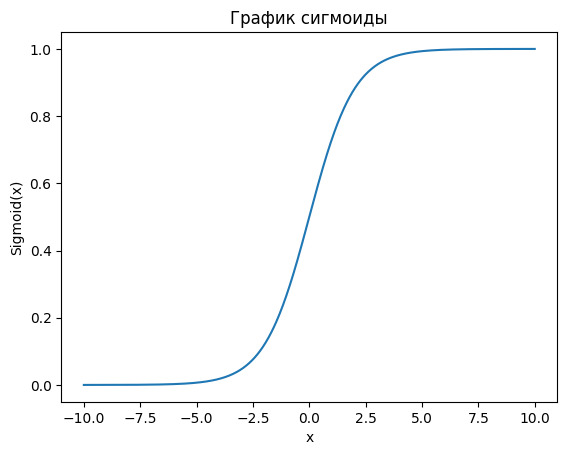

In [ ]:
X = torch.linspace(-10,10,1000)
Y = nn.Sigmoid()(X)

plt.title('График сигмоиды')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.plot(X,Y)
plt.show()

**ReLU**


$$ReLU(x) = max(0,x)$$

ReLU имеет несколько преимуществ по сравнению со сигмоидной функцией активации.
1. более вычислительно эффективна, поскольку она является простой и быстрой операцией, которая не требует вычисления экспоненты.
2. решает проблему затухания градиента, так как она не вызывает затухания градиента при обратном распространении ошибки, как это происходит в случае с сигмоидной функцией активации

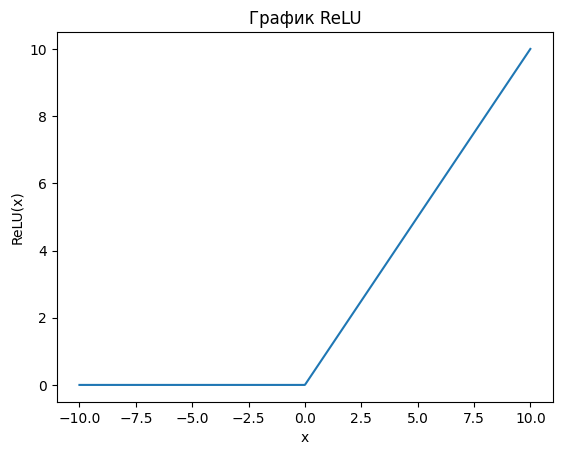

In [ ]:
X = torch.linspace(-10,10,1000)
Y = nn.ReLU()(X)

plt.title('График ReLU')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.plot(X,Y)
plt.show()

**Softmax**

Для вектора $\mathbf{x} = [x_1, x_2, \ldots, x_k]$  функция softmax возвращает вектор, состоящий из следующих компонент $softmax(\mathbf{x_j}) = \frac{e^{x_j}}{\sum^{k}_{i=1}e^{x_i}}$ for $(j = 1, \ldots, k)$, где каждая из компонент будет иметь значение от 0 до 1 и в сумме все компоненты вектора будут давать 1.

Применяется для подсчёта вероятности в мультиклассовой классификации.

In [ ]:
layer = nn.Softmax()
input = torch.randn(3)
print(input)
output = layer(input)
print(output)

tensor([-0.1589,  0.4902, -0.0120])
tensor([0.2456, 0.4700, 0.2844])


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1773: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


***Как выбирать функцию активации***:
- для внутренних слоёв часто используют ReLU или её модификации (например, LeakyReLU) ввиду простоты вычислений

- для последнего слоя часто ориентируются на задачу



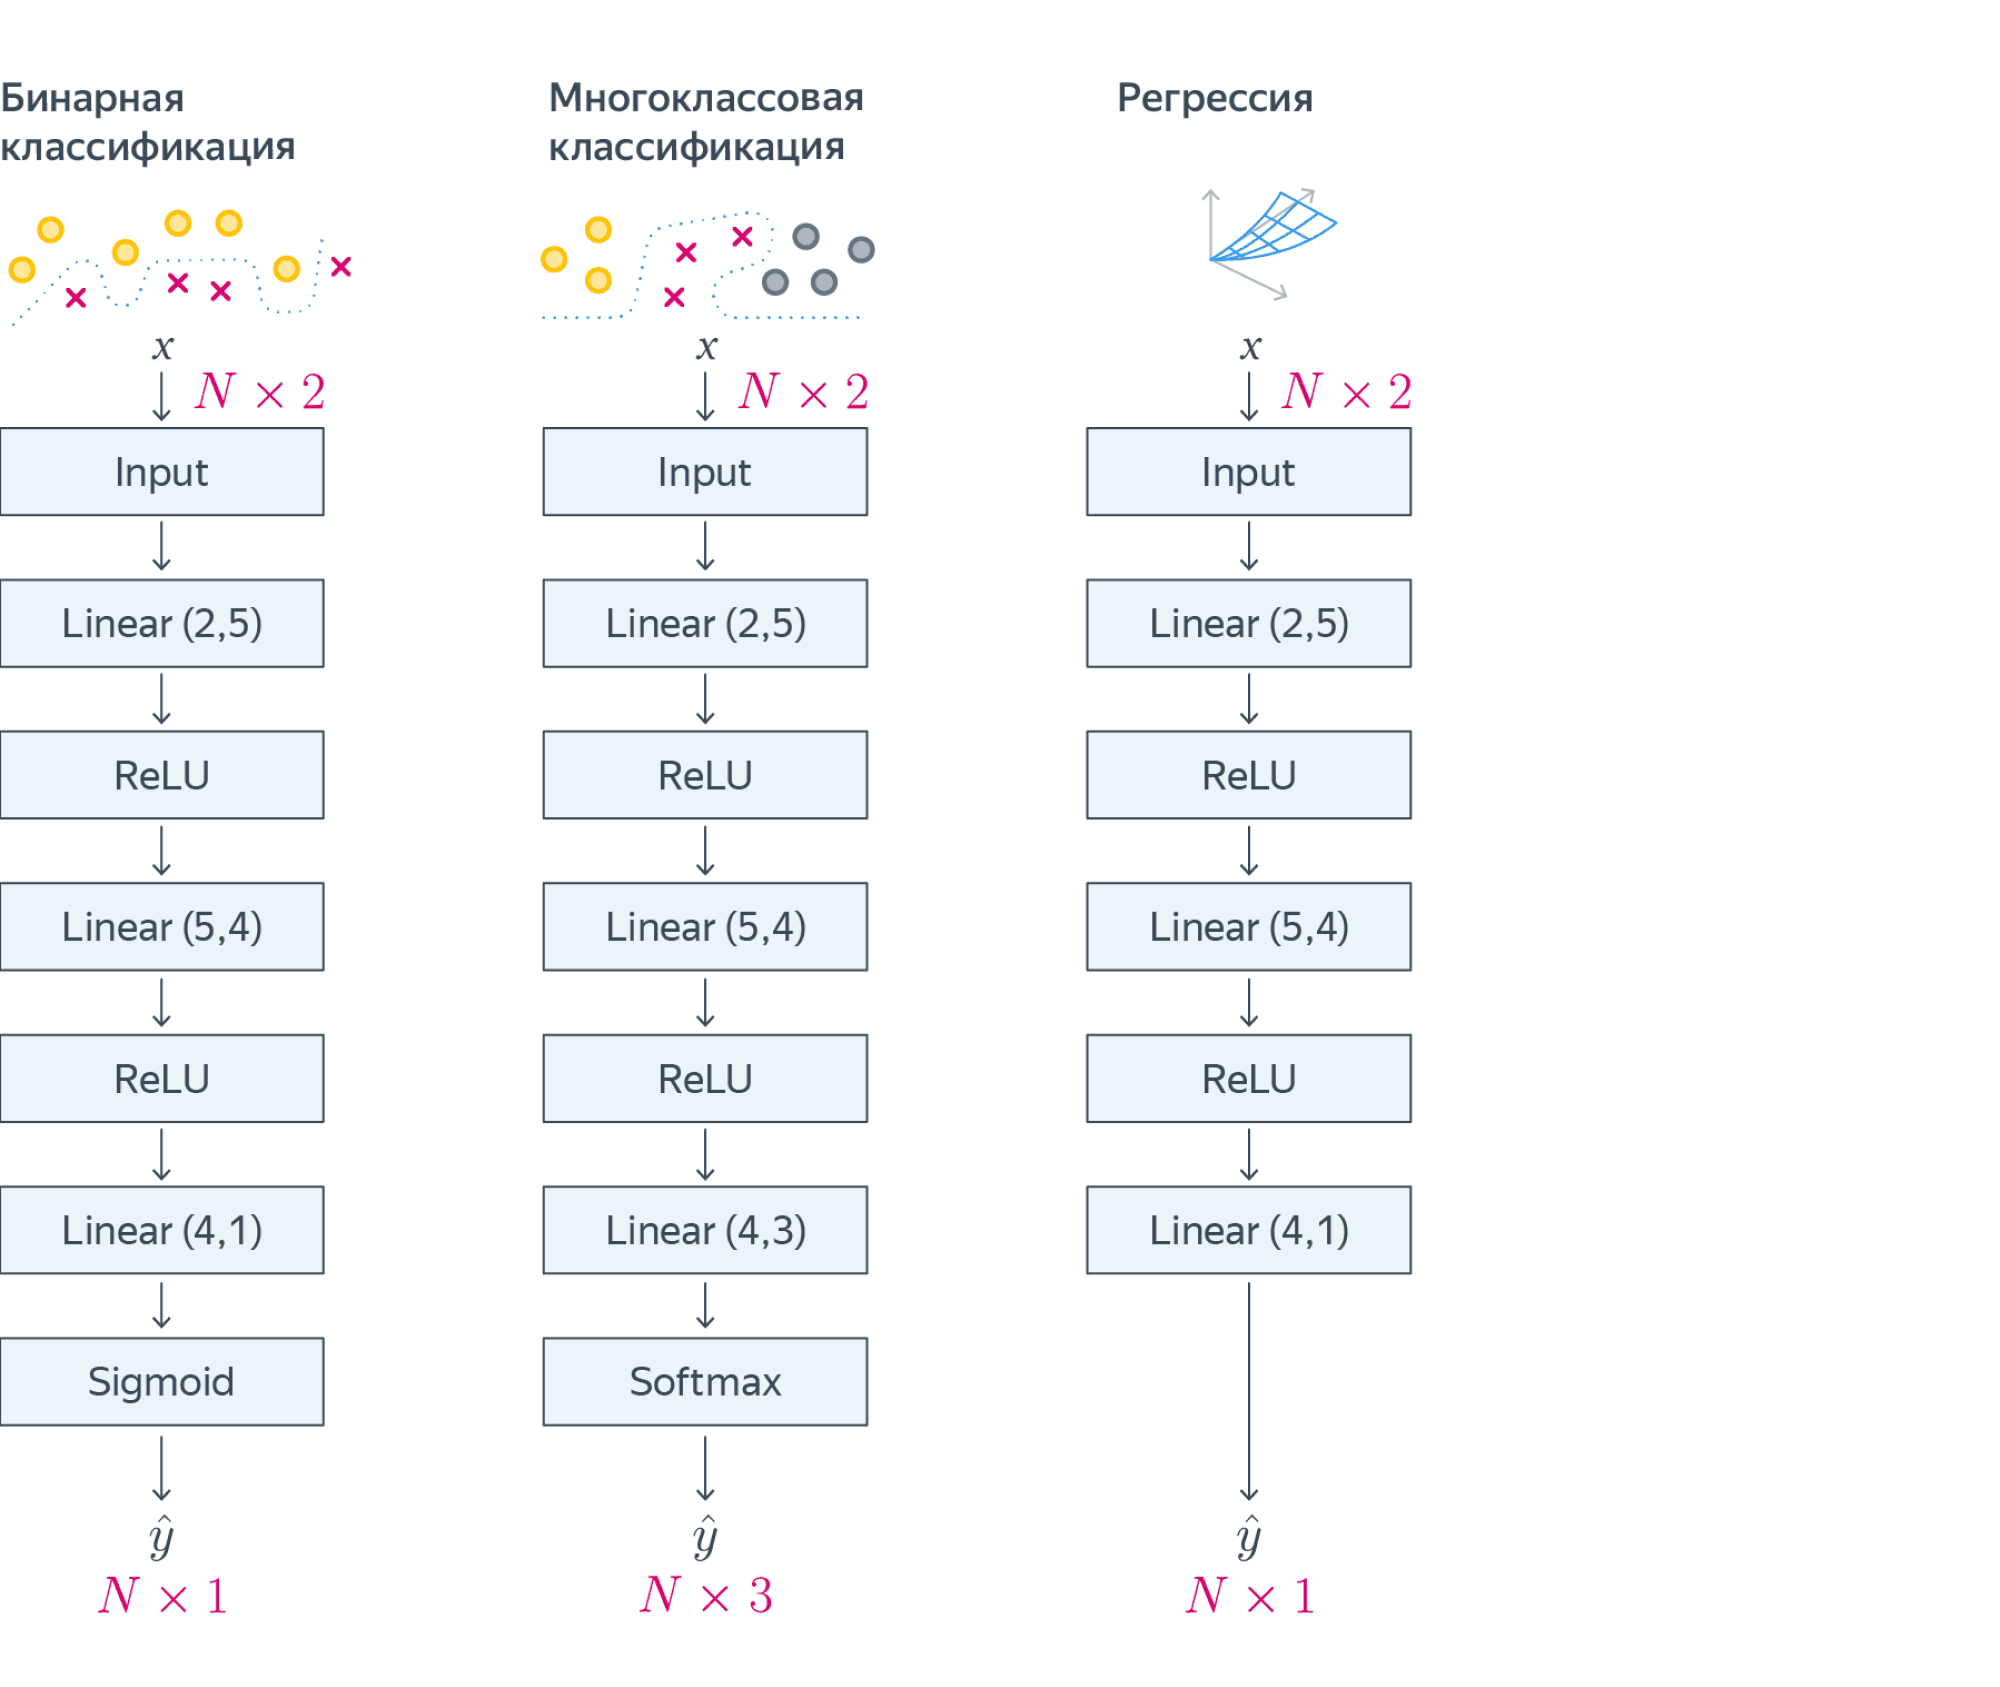

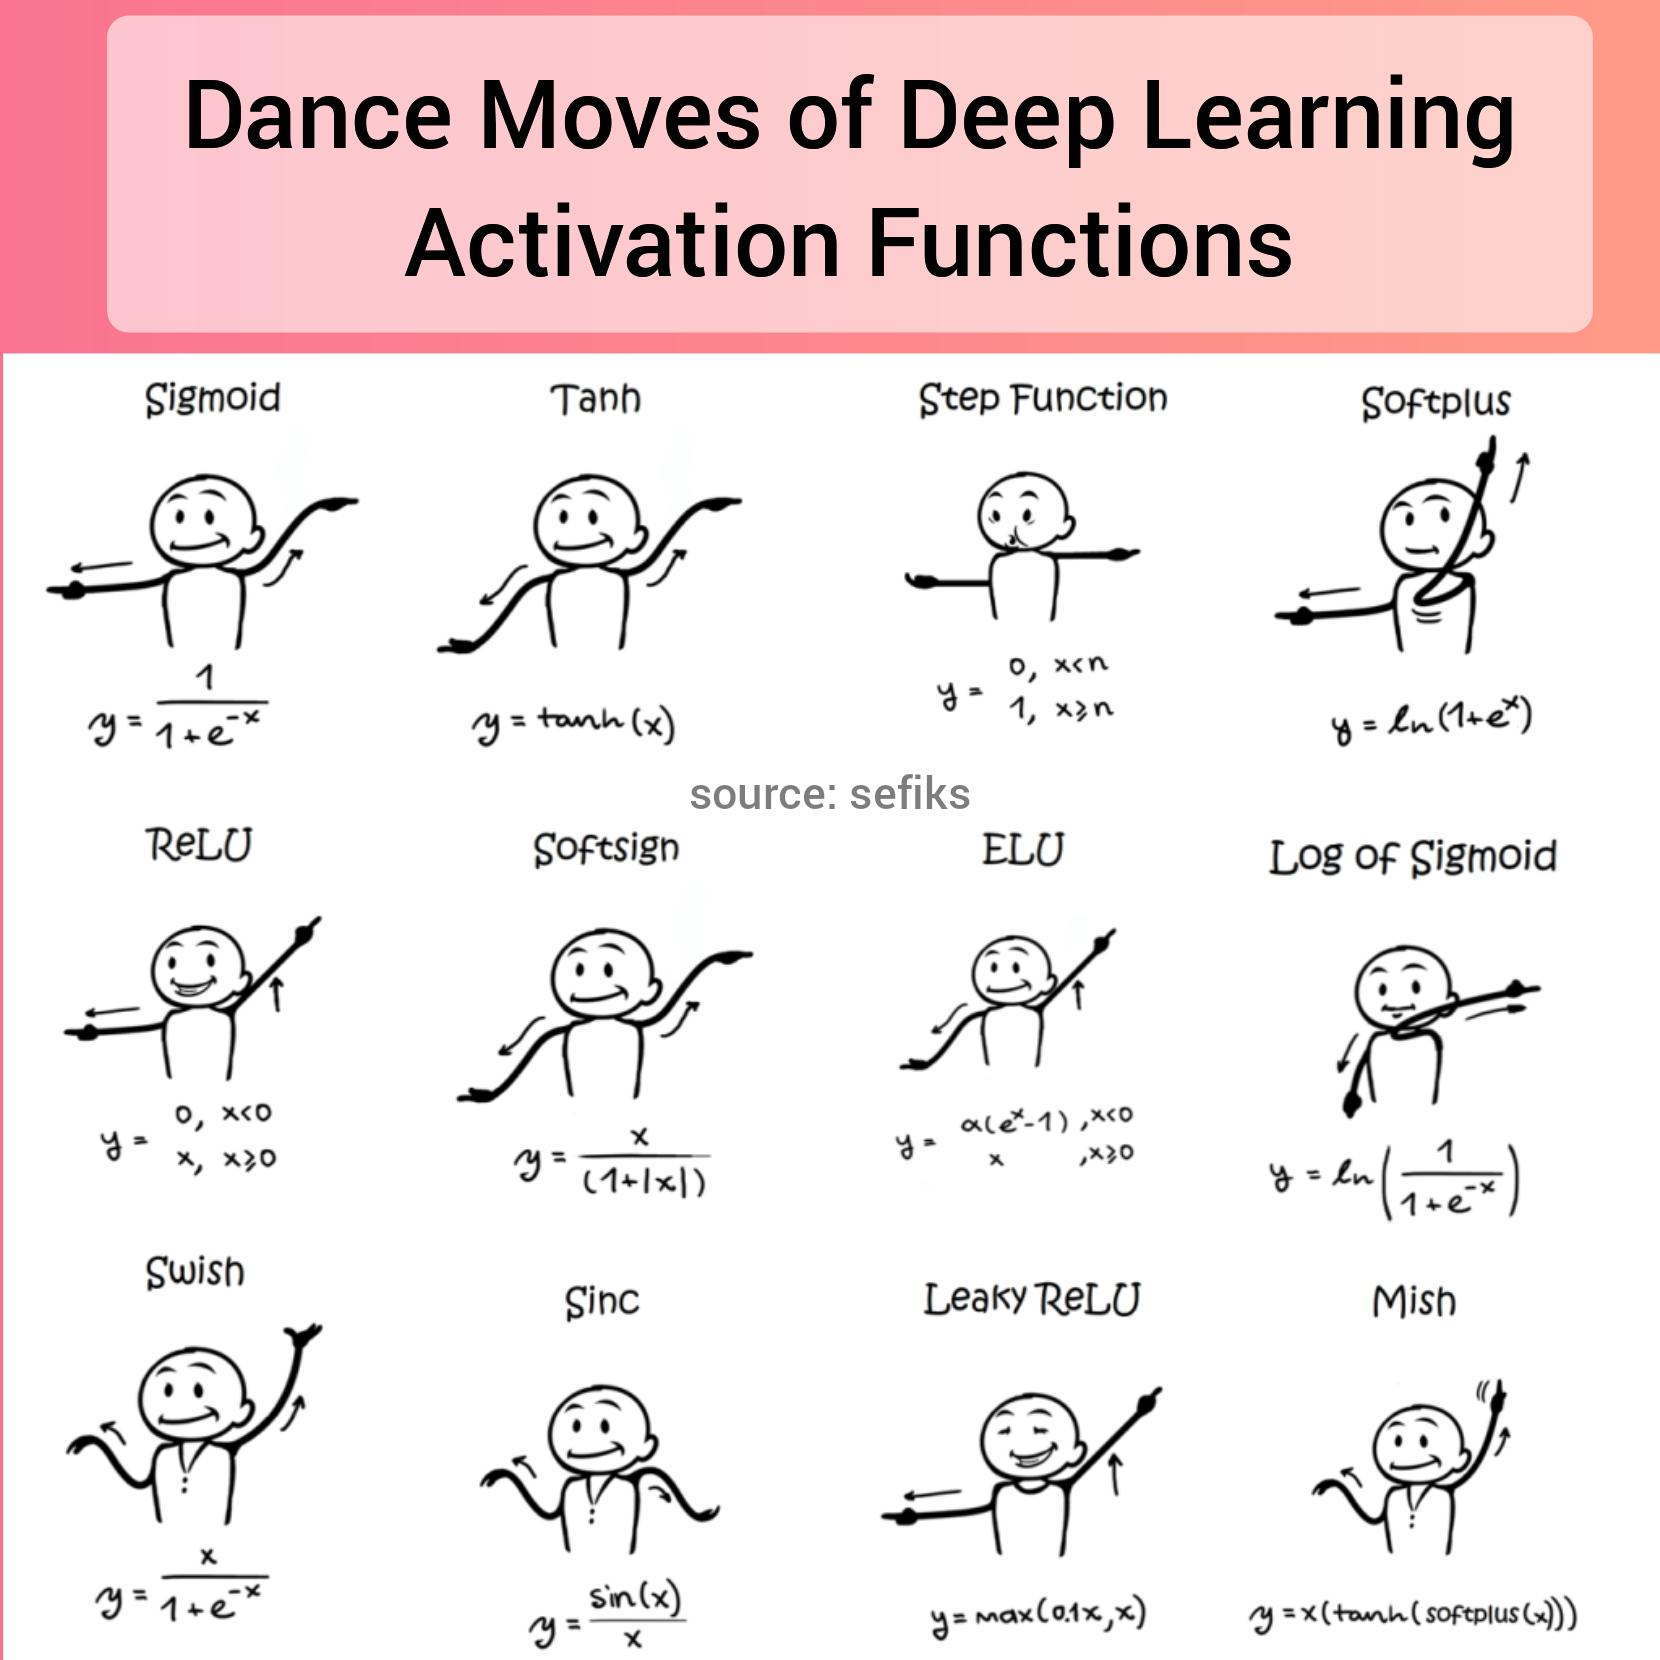

Давайте создадим простую модель, которая принимает на вход одно число и выдает на выходе тоже одно число.

Создадим сеть из 3х линейных слоёв:
`nn.Linear(1, 32)`, `nn.Linear(32, 32)`, `nn.Linear(32, 1)`, чередующихся c функциями активации

Архитектура нейросети наследуется от модуля `nn.Module`
у неё есть 2 главных метода:

- `init`, в котором мы описываем слои сети
- `forward`, в котором мы применяем слои к входным данным `x` во время прямого прохода

Структуру нашей нейросети можно визуализировать вот так: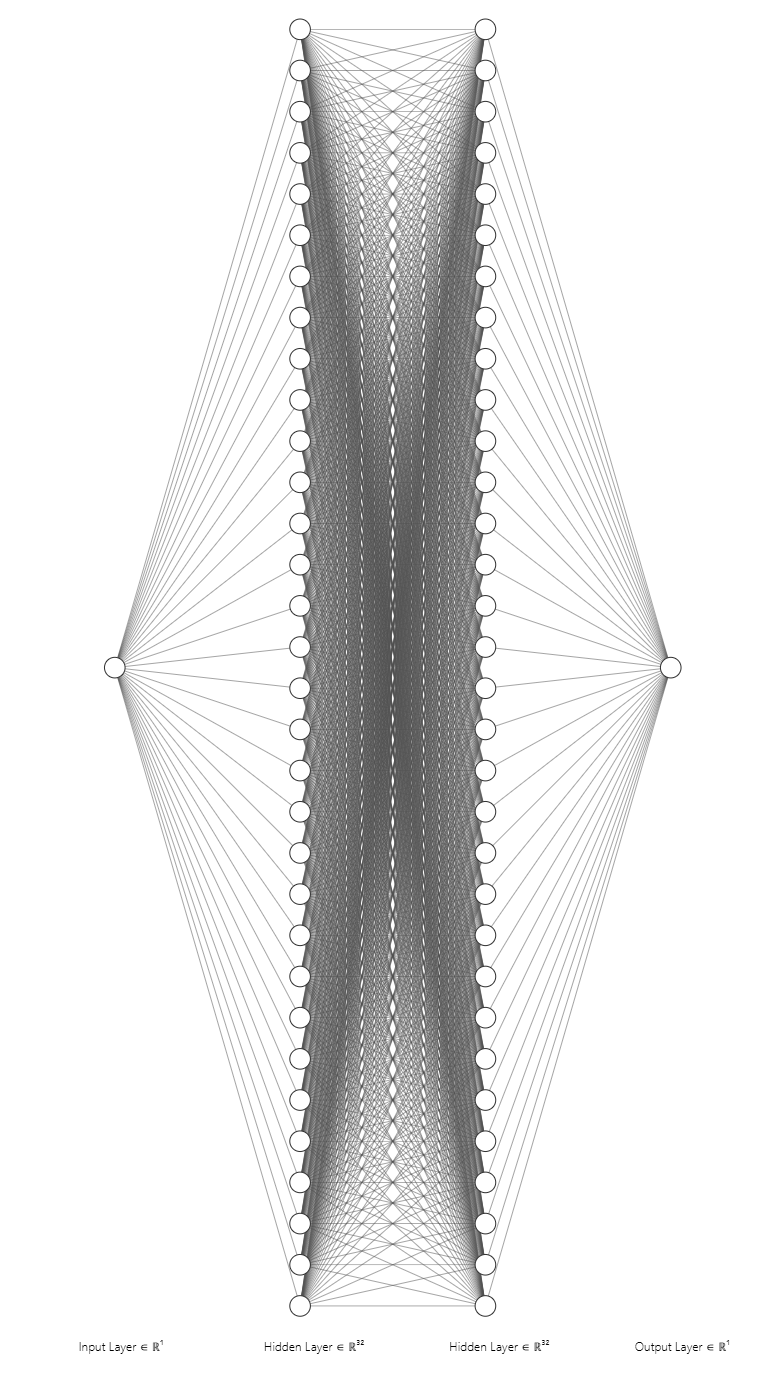

In [ ]:
class SimpleMLP(nn.Module):
    # Конструктор класса
    def __init__(self):
        super(SimpleMLP, self).__init__() # Вызов конструктора родителя

        # Объявляем слои, которые будем использовать
        self.fc1 = nn.Linear(1, 32)  # Входной слой: 1 признак -> 32 нейрона
        self.fc2 = nn.Linear(32, 32) # Скрытый слой: 32 -> 32
        self.fc3 = nn.Linear(32, 1)  # Выходной слой: 32 -> 1 результат

    # Метод forward определяет, как данные проходят через сеть
    def forward(self, x):
        x = F.relu(self.fc1(x)) # Пропускаем через 1-й слой и активацию
        x = F.relu(self.fc2(x)) # Пропускаем через 2-й слой и активацию
        x = self.fc3(x)         # Пропускаем через 3-й слой (без активации для регрессии)
        return x

Такую же модель можно задать проще с помощью класса `nn.Sequential()`, который получает на вход слои и создаёт нейросеть, применяющую эти слои последовательно

In [ ]:
#вместо model = SimpleMLP()
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid()
)

Просто создать модель недостаточно — её нужно обучить.

Оптимизатор берёт на вход веса модели и обновляет их. Классический ***SGD (stochastic gradient descent)*** на каждой итерации делает шаг в сторону антиградиента функции потерь (чтобы уменьшить её значение). В качестве параметра обучения этот оптимизатор получает `lr` - шаг оптимизации (часто выбирают $10^{-3}$ или $10^{-4}$ ). Формула обновления весов:

$$\theta_{t+1} = \theta_t - lr \cdot \nabla L(\theta_t, x_i, y_i)$$

Есть много вариаций оптимизаторов, одна из самых успешных и часто используемых - ***Adam (Adaptive Moment Estimation)*** - который комбинирует принципы SGD и его вариаций для адаптивных шагов оптимизации во время обучения.

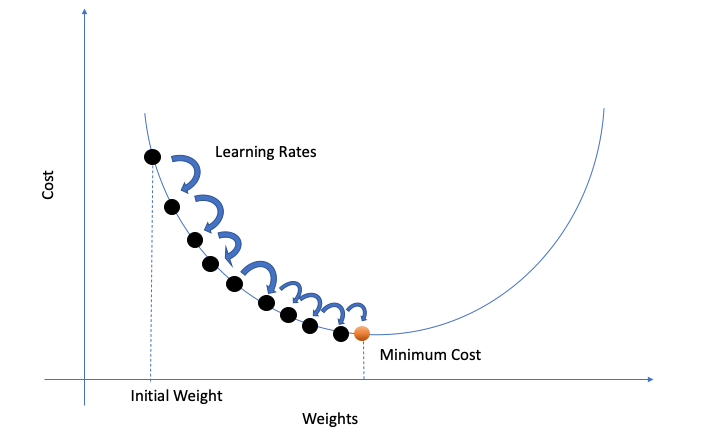

In [ ]:
import torch.optim as optim

In [ ]:
#можно попробовать использовать разные оптимизаторы
#optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)

***Процесс обучения модели***  - это процесс обновления её весов с целью минимизировать функцию потерь при помощи алгоритма обратного распространения ошибки.

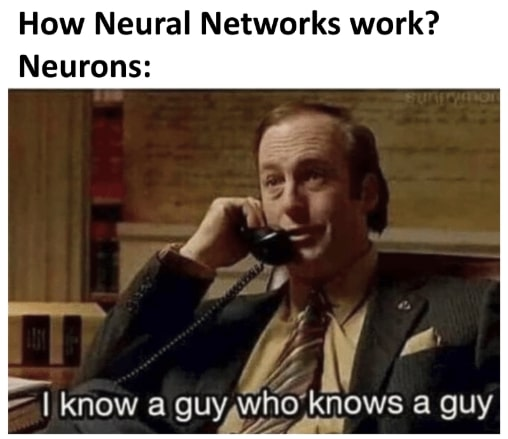

**Одна итерация** процесса обучения такой модели будет строиться так:
1. *Прямой проход (Forward pass)*: считаем $\hat{y}$ для текущих входных данных x и запоминаем значения выходов со всех слоёв
2. Считаем *функцию потерь (Loss function)* для выхода модели $\hat{y}$ и реальных значений $y$ - оцениваем, насколько модель ошибается
3. *Обратный проход (Backward pass)*: считаем градиенты функции потерь по всем обучаемым параметрам и запоминаем их
4. *Шаг оптимизации*: применяем градиентный суск для того чтобы обновить все веса сети с учётом посчитанных градиентов

Для итеративного обновления весов мы обычно несколько раз проходим по датасету.

Полный проход по всему датасету называется ***эпохой***.

Таким образом, в течение одной эпохи мы проходим по всем ***батчам*** датасета и для каждого батча делаем операцию обновления весов.

Эпоха [20/200], Ошибка (Loss): 3550.2883
Эпоха [40/200], Ошибка (Loss): 865.8571
Эпоха [60/200], Ошибка (Loss): 570.6731
Эпоха [80/200], Ошибка (Loss): 495.0014
Эпоха [100/200], Ошибка (Loss): 419.0914
Эпоха [120/200], Ошибка (Loss): 344.3907
Эпоха [140/200], Ошибка (Loss): 268.4982
Эпоха [160/200], Ошибка (Loss): 194.3142
Эпоха [180/200], Ошибка (Loss): 131.2393
Эпоха [200/200], Ошибка (Loss): 98.1283


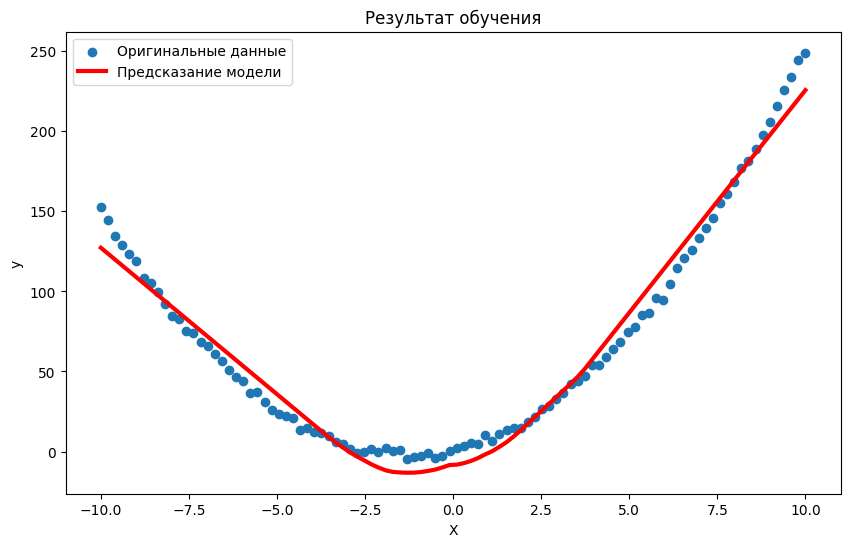


Предсказание для x = 5: 86.67


In [ ]:
import matplotlib.pyplot as plt # Для визуализации

# 1. Создание данных
# Создадим 100 точек от -10 до 10
X = torch.linspace(-10, 10, 100).unsqueeze(1) # unsqueeze(1) добавляет измерение, превращая [100] в [100, 1]
# Создаем y по формуле y = 2x^2 + 5*x + 1 с добавлением случайного шума
y = 2 * X**2 + 5*X + 1 + torch.randn(X.size()) * 2

# 2. Инициализация модели, функции потерь и оптимизатора
model = SimpleMLP()
criterion = nn.MSELoss()  # Среднеквадратичная ошибка - отлично для регрессии
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Adam - популярный и эффективный оптимизатор

# 3. Цикл обучения
epochs = 200 # Количество эпох (проходов по всем данным)
for epoch in range(epochs):
    # === Шаг 1: Прямой проход (Forward pass) ===
    outputs = model(X)

    # === Шаг 2: Вычисление ошибки (Loss) ===
    loss = criterion(outputs, y)

    # === Шаг 3: Обнуление градиентов ===
    # Важно делать это на каждой итерации!
    optimizer.zero_grad()

    # === Шаг 4: Обратный проход (Backward pass) ===
    # PyTorch считает градиенты для всех параметров
    loss.backward()

    # === Шаг 5: Шаг оптимизации ===
    # Оптимизатор обновляет веса модели на основе градиентов
    optimizer.step()

    # Выводим информацию каждые 20 эпох
    if (epoch + 1) % 20 == 0:
        print(f'Эпоха [{epoch+1}/{epochs}], Ошибка (Loss): {loss.item():.4f}')

# 4. Визуализация результата
# Переводим модель в режим оценки (важно для более сложных моделей)
model.eval()
with torch.no_grad(): # Отключаем расчет градиентов для предсказания
    predicted = model(X).detach().numpy()

plt.figure(figsize=(10, 6))
plt.scatter(X.numpy(), y.numpy(), label='Оригинальные данные')
plt.plot(X.numpy(), predicted, color='red', linewidth=3, label='Предсказание модели')
plt.title('Результат обучения')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 5. Проверка на новом значении
# Как модель предскажет значение для x=5? (Ожидаем ~76)
new_x = torch.tensor([[5.0]])
prediction = model(new_x)
print(f"\nПредсказание для x = 5: {prediction.item():.2f}")

Важно заметить, что функция потерь при обучении снижается - значит мы достигаем своей цели в решении задачи: наша модель более точно предсказывает значение настоящей функции.

### Упражнение

Проведите несколько экспериментов (важно в одном эксперименте делать одно изменение):
- увеличьте количество слоёв или внутренних параметров слоёв
- поменяйте функции активации
- попробуйте поменять функцию, задающую данные

влияют ли как-то эти изменения на обучение?

Полезные ссылки:
- https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.06564&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false классный сайт для визуализации работы MLP
- https://cs182sp21.github.io/static/slides/lec-5.pdf более формальное объяснение работы backpropagation
- https://www.youtube.com/watch?v=Ilg3gGewQ5U подробное объяснение backpropagation с визуализацией.

## Итоги семинара

На этом семинаре мы:

1. Начали учиться работать с библиотекой для нейронных сетей **`PyTorch`** и познакомились с её базовым функционалом и возможностями для работы с тензорами;
2. познакомились основными терминами нейросетей - **нейрон**, **слои**, **функция активации**, **функция ошибки (loss)**, **обучение/тренировка**, **батч**, **эпоха**.
3. Построили и обучили первую нейросеть.
